# Traffic Volume Dataset - Sourced from : https://www.kaggle.com/rohith203/traffic-volume-dataset 

## Importing Packages to be used

In [ ]:
#General and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import re
import io
import copy

import matplotlib.pyplot as plt

%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#For Model Implementation and Evaluation
from sklearn import metrics

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For Support Vector implementation
from sklearn.svm import SVC

#For KNN implementation
from sklearn.neighbors import KNeighborsClassifier

#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

#For AdaBoost implementation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
initial_traffic_volume = pd.read_csv('Train.csv')
initial_traffic_volume.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,10/2/12 9:00,0,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,10/2/12 10:00,0,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,10/2/12 11:00,0,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,10/2/12 12:00,0,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,10/2/12 13:00,0,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


## EDA and Preprocessing of data

In [ ]:
initial_traffic_volume.corr()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
is_holiday,1.000000,0.003976,-0.001034,0.000298,0.002111,-0.007291,-0.007291,-0.005266,-0.000248,-0.001162,0.000241,-0.043080
air_pollution_index,0.003976,1.000000,-0.000277,-0.004166,0.000749,0.003499,0.003499,0.005368,0.000443,0.007227,-0.008541,-0.003751
humidity,-0.001034,-0.000277,1.000000,-0.147042,-0.046268,0.005510,0.005510,0.033273,-0.012161,0.016625,0.014520,0.016455
wind_speed,0.000298,-0.004166,-0.147042,1.000000,0.191320,-0.005160,-0.005160,-0.052856,0.001165,-0.006534,-0.004456,0.016329
wind_direction,0.002111,0.000749,-0.046268,0.191320,1.000000,0.000716,0.000716,-0.045843,0.002230,0.000321,0.020392,0.014278
visibility_in_miles,-0.007291,0.003499,0.005510,-0.005160,0.000716,1.000000,1.000000,0.000760,-0.008301,0.001453,-0.001582,0.001348
dew_point,-0.007291,0.003499,0.005510,-0.005160,0.000716,1.000000,1.000000,0.000760,-0.008301,0.001453,-0.001582,0.001348
temperature,-0.005266,0.005368,0.033273,-0.052856,-0.045843,0.000760,0.000760,1.000000,0.011071,-0.020721,-0.121334,0.127871
rain_p_h,-0.000248,0.000443,-0.012161,0.001165,0.002230,-0.008301,-0.008301,0.011071,1.000000,-0.000159,0.005206,0.005642
snow_p_h,-0.001162,0.007227,0.016625,-0.006534,0.000321,0.001453,0.001453,-0.020721,-0.000159,1.000000,0.032591,0.001197


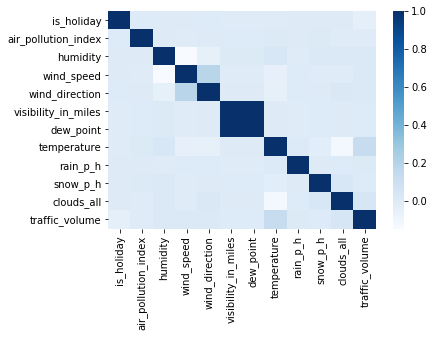

In [ ]:
sns.heatmap(initial_traffic_volume.corr(), cmap="Blues")

In [ ]:
# Splitting of date time into Year, Month, Day, Hour
initial_traffic_volume['date_time'] = pd.to_datetime(initial_traffic_volume.date_time)
initial_traffic_volume['year'] = initial_traffic_volume.date_time.dt.year
initial_traffic_volume['month'] = initial_traffic_volume.date_time.dt.month
initial_traffic_volume['day'] = initial_traffic_volume.date_time.dt.day
initial_traffic_volume['hour'] = initial_traffic_volume.date_time.dt.hour
initial_traffic_volume.sample(5)

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,hour
6652,2013-06-03 22:00:00,0,42,51,2,179,6,6,287.430,0.0,0.0,1,Clear,sky is clear,1705,2013,6,3,22
15964,2014-08-07 19:00:00,0,51,79,3,336,5,5,299.150,0.0,0.0,1,Clear,sky is clear,3826,2014,8,7,19
27636,2016-10-27 20:00:00,0,296,74,4,350,6,6,280.562,0.0,0.0,0,Clear,Sky is Clear,2646,2016,10,27,20
2218,2012-12-19 21:00:00,0,80,60,5,290,4,4,269.580,0.0,0.0,90,Haze,haze,2591,2012,12,19,21
16740,2015-07-21 07:00:00,0,37,94,2,217,4,4,289.470,0.0,0.0,1,Clear,sky is clear,5130,2015,7,21,7


In [ ]:
# making a copy of the dataframe
init_traffic_volume = copy.deepcopy(initial_traffic_volume)

In [ ]:
# Dropping of unnecessary columns to reduce dimensionality. These columns are based on our EDA,
# what can be applied to an SG context (eg. no snow) as well as trial and error to get optimized models
traffic_volume = initial_traffic_volume.drop(['date_time', "air_pollution_index", 'visibility_in_miles', 'rain_p_h', 'dew_point', 'snow_p_h', 'weather_description', 'is_holiday', 'year'], axis=1)
traffic_volume.sample(5)

,humidity,wind_speed,wind_direction,temperature,clouds_all,weather_type,traffic_volume,month,day,hour
21335,71,2,178,272.37,90,Mist,5127,2,16,9
4079,72,7,280,268.61,90,Snow,3380,3,5,8
16424,75,0,145,298.48,1,Clear,3620,7,9,19
29296,85,1,230,270.27,75,Clouds,427,12,20,3
7742,51,3,201,305.50,8,Clear,6337,7,17,16


In [ ]:
# Mapping of weather type to numbers
traffic_volume['weather_type'] = traffic_volume['weather_type'].map({
    'Clouds':1,
    'Clear':2, 
    'Mist':3, 
    'Rain':4, 
    'Snow':5, 
    'Drizzle':6, 
    'Haze':7,
    'Fog':8,
    'Thunderstorm':9,
    'Smoke':10,
    'Squall':11
})
traffic_volume.head()

,humidity,wind_speed,wind_direction,temperature,clouds_all,weather_type,traffic_volume,month,day,hour
0,89,2,329,288.28,40,1,5545,10,2,9
1,67,3,330,289.36,75,1,4516,10,2,10
2,66,3,329,289.58,90,1,4767,10,2,11
3,66,3,329,290.13,90,1,5026,10,2,12
4,65,3,329,291.14,75,1,4918,10,2,13


In [ ]:
#Reorganisation of columns for target (traffic volume) to be set at the last column
traffic_volume = traffic_volume[['month','day','hour','humidity', 'wind_speed', 'wind_direction', 'temperature', 'clouds_all', 'weather_type', 'traffic_volume']]
traffic_volume.head()

,month,day,hour,humidity,wind_speed,wind_direction,temperature,clouds_all,weather_type,traffic_volume
0,10,2,9,89,2,329,288.28,40,1,5545
1,10,2,10,67,3,330,289.36,75,1,4516
2,10,2,11,66,3,329,289.58,90,1,4767
3,10,2,12,66,3,329,290.13,90,1,5026
4,10,2,13,65,3,329,291.14,75,1,4918


In [ ]:
#Exploring of traffic volume data
traffic_volume['traffic_volume'].describe()

count    33750.000000
mean      3240.118163
std       1991.487289
min          0.000000
25%       1165.250000
50%       3335.000000
75%       4926.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [ ]:
#Binning of traffic volume data into 3 levels
labels_traffic = [0, 1, 2]
traffic_volume['traffic_vol'] = pd.qcut(traffic_volume['traffic_volume'], q=3 , labels = labels_traffic)
traffic_volume.sample(5)

,month,day,hour,humidity,wind_speed,wind_direction,temperature,clouds_all,weather_type,traffic_volume,traffic_vol
27773,11,2,13,92,2,281,286.82,1,2,4323,1
11159,1,2,6,68,0,180,248.48,1,2,5032,2
14241,5,11,22,24,2,240,290.64,90,4,1746,0
24909,7,13,3,87,1,98,295.09,1,2,357,0
14518,5,20,17,81,0,0,298.29,1,2,6165,2


In [ ]:
# Dropping the numbered traffic volume column
traffic_volume = traffic_volume.drop(['traffic_volume'], axis=1)
traffic_volume.head()

,month,day,hour,humidity,wind_speed,wind_direction,temperature,clouds_all,weather_type,traffic_vol
0,10,2,9,89,2,329,288.28,40,1,2
1,10,2,10,67,3,330,289.36,75,1,1
2,10,2,11,66,3,329,289.58,90,1,2
3,10,2,12,66,3,329,290.13,90,1,2
4,10,2,13,65,3,329,291.14,75,1,2


## Normalisation of data

In [ ]:
standardScaler = StandardScaler()
traffic_volume.iloc[:, :-1] = standardScaler.fit_transform(traffic_volume.iloc[:, :-1])

## Splitting of data into training (0.7) and testing (0.3)

In [ ]:
X = traffic_volume.iloc[:, :-1]
X.head()

,month,day,hour,humidity,wind_speed,wind_direction,temperature,clouds_all,weather_type
0,1.013868,-1.568527,-0.345906,1.055720,-0.670405,1.297362,0.612030,-0.269063,-0.888882
1,1.013868,-1.568527,-0.202041,-0.249763,-0.183967,1.307378,0.692536,0.631348,-0.888882
2,1.013868,-1.568527,-0.058177,-0.309103,-0.183967,1.297362,0.708936,1.017238,-0.888882
3,1.013868,-1.568527,0.085688,-0.309103,-0.183967,1.297362,0.749934,1.017238,-0.888882
4,1.013868,-1.568527,0.229553,-0.368443,-0.183967,1.297362,0.825223,0.631348,-0.888882


In [ ]:
y = traffic_volume.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

# Testing of different models
### Models Used:
- Support Vector Classifier
- Random Forest
- K-Nearest Neighbours (K-NN)
- Adaboost (With decision tree)
- Bagging (With decision tree)

## Support Vector Classifier

In [ ]:
#Using default hyperparameters
svc = SVC()
svc.fit(X_train, y_train)
svm_def = svc.predict(X_test)
# Accuracy 
# due to the target being non binary, precision and recall will not be used as metrics
print("Accuracy Score:", metrics.accuracy_score(y_test,svm_def))

Accuracy Score: 0.7425185185185185


In [ ]:
# Tweaking hyperparameters
svc = SVC(kernel = 'rbf', C = 0.8, gamma = 0.6)
svc.fit(X_train, y_train)
svm_tweak = svc.predict(X_test)
# Accuracy 
print("Accuracy Score:", metrics.accuracy_score(y_test,svm_tweak))

Accuracy Score: 0.7475555555555555


## Random Forest

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=110)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
forest_pred=clf.predict(X_test)
#Accuracy
print("Accuracy Score:", metrics.accuracy_score(y_test,forest_pred))

Accuracy Score: 0.8551111111111112


## K-Nearest Neighbours (K-NN)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train,y_train)
knn = model.predict(X_test)
# Accuracy 
print("Accuracy Score:", metrics.accuracy_score(y_test,knn))

Accuracy Score: 0.6805925925925926


## Adaboost (with Decision Tree)

In [ ]:
#Default base classifiers is Decision Tree.
model = AdaBoostClassifier(n_estimators=50,learning_rate=0.1)
model.fit(X_train, y_train)
ada_pred = model.predict(X_test)
print("Accuracy Score:", metrics.accuracy_score(y_test,ada_pred))

Accuracy Score: 0.6949135802469136


## Bagging (with Decision tree)

In [ ]:
#Default base classifiers is Decision Tree. 
bag_model = BaggingClassifier(n_estimators=50)
bag_model.fit(X_train, y_train)
bag_pred = model.predict(X_test)
print("Accuracy Score:", metrics.accuracy_score(y_test,bag_pred))

Accuracy Score: 0.6949135802469136
